<h1>Covertype Data Set</h1>

Name: Jonathan Menahem <br>
ID: 203772611 <br>


<h2>Links:</h2>

[**Problem description and database**](https://archive.ics.uci.edu/ml/datasets/covertype)

[**Jupyter Notebook to read data**](https://drive.google.com/file/d/1T-03NBNnec5-acdGrWxBfwW14enWPobv/view)

[**Feature selection**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

[**Neural network models (supervised)**](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[**TabNet**](https://github.com/dreamquark-ai/tabnet)

[**Markdown syntax**](https://www.markdownguide.org/basic-syntax/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

<h1>Data Exploration</h1>

<h2>1. Downloading the dataset into dataframe</h2>

In [2]:
# creating column names for data
target = "Covertype"

bool_columns = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

int_columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
    int_columns + bool_columns + [target])

In [3]:
# importing dataset into a variable named 'data'

data = pd.read_csv('forest-cover-type.csv', header=None, names=feature_columns)

#data = original_data.sample(n=15120)

<h2>2. Review of the different features</h2>

In [4]:
# dataframe's features

data.columns.drop('Covertype')

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
# unique labels for Covertype as follows
# 1 - Spruce/Fir - אשוחית/אשוח
# 2 - Lodgepole Pine - אורן לודג'פול
# 3 - Ponderosa Pine - אורן פונדרוסה
# 4 - Cottonwood/Willow - כותנה/ערבה
# 5 - Aspen - צַפצָפָה רַעֲדָנִית
# 6 - Douglas-fir - אשוח-דאגלס
# 7 - Krummholz - קרומהולץ

data.Covertype.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

All observations seems complete with no missing data so there is no need to make changes to the dataset

In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Covertype
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## The next section has been commented because it takes a lot of time to proccess.
## The result is saved in the file "pandas_profiling.html"

In [8]:
# pandas profiling report

#import pandas_profiling as pp

#profile = pp.ProfileReport(data, title = 'Pandas Profiling report of data', html = {'style':{'full_width': True}})
#profile.to_file("pandas_profiling.html")
#profile

In [156]:
# deviding the data into labels and features in order to split the data properly

features = data.drop(['Covertype'] , axis = 1) # labels only ('Covertype')

labels = data['Covertype']

In [157]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, features, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

## Trying feature selection for Random Forest (took about 3 hours of calculation to get the 20 best features)

I also tried to do the same for XGBoost but after 9.5 hours I gave up.

In [158]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

#forest = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=21, max_features=6, min_samples_leaf=2, min_samples_split=8, bootstrap=True, n_jobs=-1)
#sfs = SequentialFeatureSelector(forest, n_features_to_select=20)
#sfs.fit(val_features, val_labels)

#sfs.get_support(indices=True)

In [159]:
forest_features = [0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 14, 18, 29, 33, 34, 36, 42, 44, 45, 46]

In [160]:
all_features = data.columns.drop('Covertype')
selected_forest_features = [all_features[i] for i in forest_features]

In [161]:
selected_forest_features_data = data.filter(selected_forest_features)

In [162]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, selected_forest_features_data, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

<AxesSubplot:>

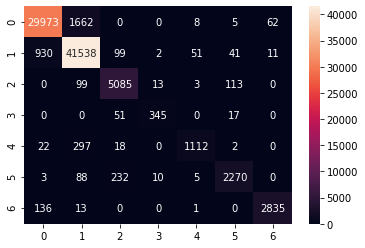

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


forest = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=21, max_features=6, min_samples_leaf=2, min_samples_split=8, bootstrap=True, n_jobs=6)
forest.fit(train_features, train_labels)

test_pred_labels = forest.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [164]:
# a table to contain all the results for model training, validation and test for later comparison

scores = pd.DataFrame(columns=['Train Accuracy','Validation Accuracy','Test Accuracy'],index=['Forest', 'Forest_SFS', 'XGBoost', 'XGBoost_SFS'])

In [165]:
# adding the results to the table

scores.at['Forest_SFS','Train Accuracy'] = forest.score(train_features, train_labels)
scores.at['Forest_SFS','Validation Accuracy'] = forest.score(val_features, val_labels)
scores.at['Forest_SFS','Test Accuracy'] = forest.score(test_features, test_labels)

In [166]:
scores

,Train Accuracy,Validation Accuracy,Test Accuracy
Forest,NaN,NaN,NaN
Forest_SFS,0.986249,0.953474,0.954172
XGBoost,NaN,NaN,NaN
XGBoost_SFS,NaN,NaN,NaN


# Here I am using the same selected features on XGBoost model.

I did try to use SFS for XGBoost but I gave up after 9.5 hours of computing. 

<AxesSubplot:>

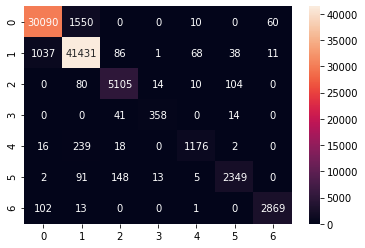

In [167]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

XGB = XGBClassifier(eval_metric='merror', n_estimators=100, learning_rate=0.25, max_depth=11, min_child_weight=1, gamma=0, colsample_bytree=0.7, n_jobs=4)

XGB.fit(train_features, train_labels)

test_pred_labels = XGB.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [168]:
# adding the results to the table

scores.at['XGBoost_SFS','Train Accuracy'] = XGB.score(train_features, train_labels)
scores.at['XGBoost_SFS','Validation Accuracy'] = XGB.score(val_features, val_labels)
scores.at['XGBoost_SFS','Test Accuracy'] = XGB.score(test_features, test_labels)

In [169]:
scores

,Train Accuracy,Validation Accuracy,Test Accuracy
Forest,NaN,NaN,NaN
Forest_SFS,0.986249,0.953474,0.954172
XGBoost,NaN,NaN,NaN
XGBoost_SFS,0.988546,0.954924,0.956696


# Choosing the best features based on correlation

The dataset contains a combination of categorical and continuous features so in order to calculate their we need to use correlation ratio.

In [171]:
# here is a pre maid function to help with this proccess:

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [172]:
# splitting the features into categorial and continuous

bool_cols_target = bool_columns + [target]
int_cols_target = int_columns + [target]

feature_categories = data.filter(bool_cols_target)
feature_measurments = data.filter(int_cols_target)

In [173]:
corr_data = np.zeros((len(bool_cols_target), len(int_cols_target)))

for i in range(len(bool_cols_target)):
    for j in range(len(int_cols_target)):
        cat = feature_categories[bool_cols_target[i]]
        measure = feature_measurments[int_cols_target[j]]
        corr_data[i][j] = (correlation_ratio(cat, measure))

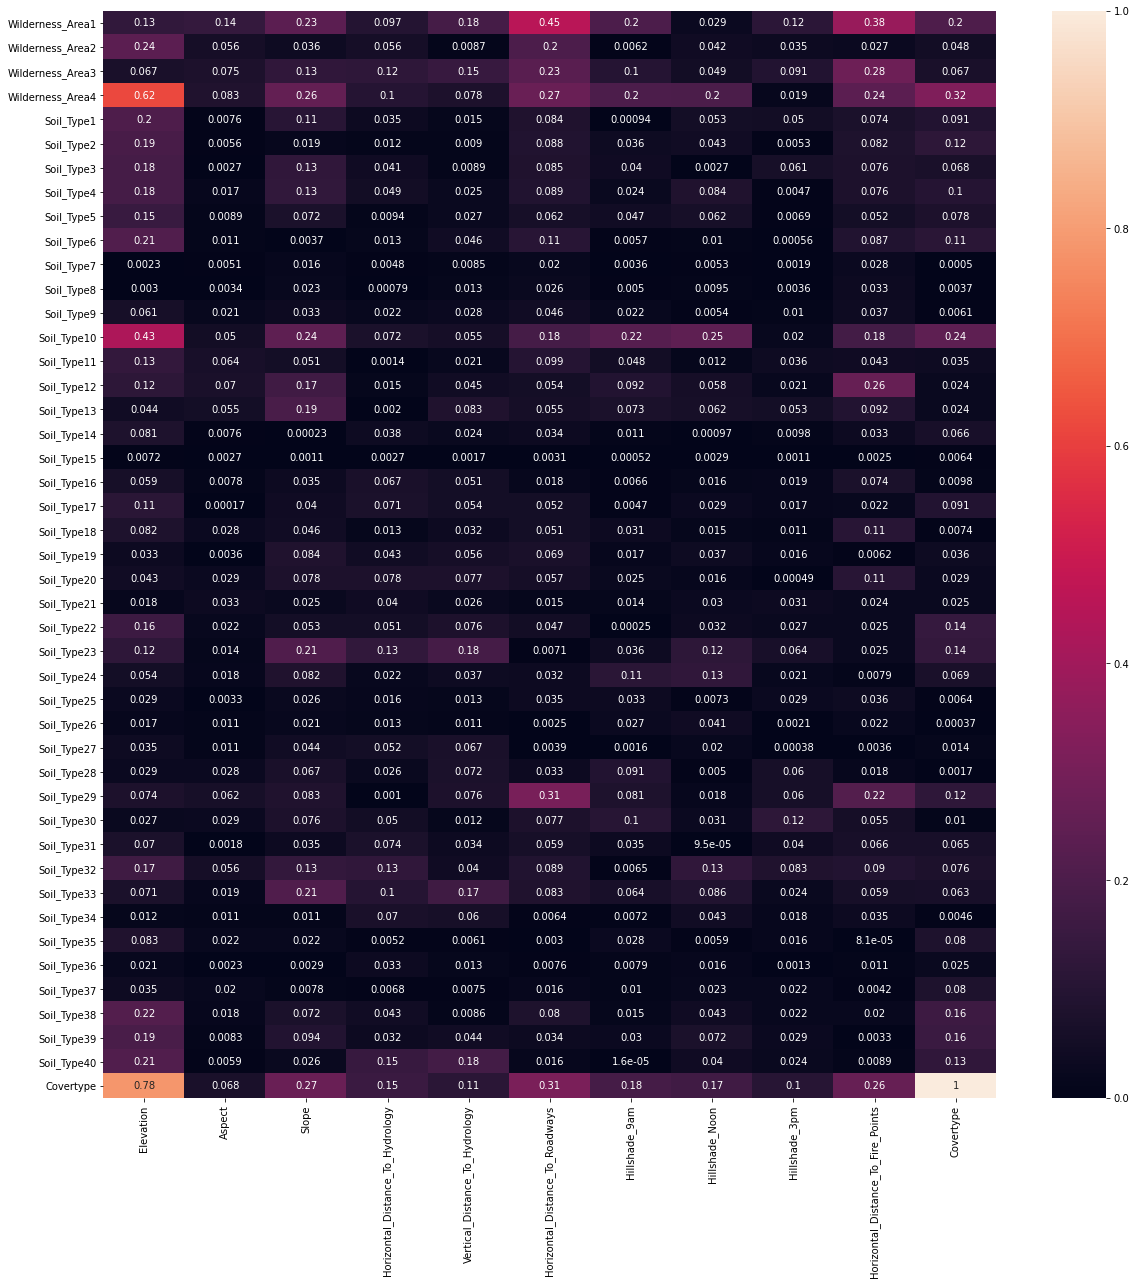

In [174]:
plt.figure(figsize=(20, 20))
x_axis_labels = int_cols_target
y_axis_labels = bool_cols_target
sns.heatmap(corr_data, vmin=0, vmax=1, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

Based on this correlation matrix I will choose the best N features and based on them i will train the models.

I will also tune what is the best minimal N for the best results.

I ended up choosing N = 19. There is no special reason for choosing that value other than model performance.

In [175]:
best_corr_features = ["Elevation", "Slope", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", 
    "Wilderness_Area2", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", 
    "Soil_Type10", "Soil_Type22", "Soil_Type23", "Soil_Type32", "Soil_Type38", "Soil_Type39", "Soil_Type40"]

In [176]:
selected_forest_features_data_corr = data.filter(best_corr_features)

In [177]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, selected_forest_features_data_corr, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

<AxesSubplot:>

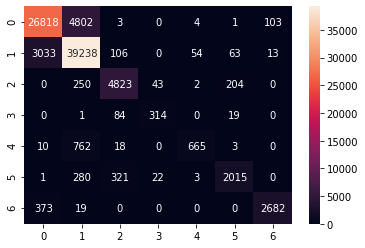

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


forest = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=21, max_features=6, min_samples_leaf=2, min_samples_split=8, bootstrap=True, n_jobs=6)
forest.fit(train_features, train_labels)

test_pred_labels = forest.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [179]:
# adding the results to the table

scores.at['Forest','Train Accuracy'] = forest.score(train_features, train_labels)
scores.at['Forest','Validation Accuracy'] = forest.score(val_features, val_labels)
scores.at['Forest','Test Accuracy'] = forest.score(test_features, test_labels)

In [180]:
scores

,Train Accuracy,Validation Accuracy,Test Accuracy
Forest,0.90837,0.875587,0.878408
Forest_SFS,0.986249,0.953474,0.954172
XGBoost,NaN,NaN,NaN
XGBoost_SFS,0.988546,0.954924,0.956696


Lets compare the SFS method with correlation ratio method in terms of feature overlap

In [181]:
print("Number of features for SFS method:", len(selected_forest_features))
print("Number of features for Correlation Ratio method:", len(best_corr_features))
print("The different feature count is:", len(list(set(selected_forest_features) - set(best_corr_features))))
print("The difference in features is:", list(set(selected_forest_features) - set(best_corr_features)))
print("The similar feature count is:", len(set(selected_forest_features) & set(best_corr_features)))
print("The similar features are:", set(selected_forest_features) & set(best_corr_features))

Number of features for SFS method: 20
Number of features for Correlation Ratio method: 19
The different feature count is: 11
The difference in features is: ['Soil_Type29', 'Wilderness_Area3', 'Wilderness_Area1', 'Soil_Type21', 'Soil_Type16', 'Vertical_Distance_To_Hydrology', 'Soil_Type33', 'Soil_Type20', 'Horizontal_Distance_To_Hydrology', 'Soil_Type31', 'Aspect']
The similar feature count is: 9
The similar features are: {'Elevation', 'Soil_Type32', 'Soil_Type1', 'Soil_Type5', 'Wilderness_Area2', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type23', 'Slope'}


# Lets try the correlated based using XGBoost

<AxesSubplot:>

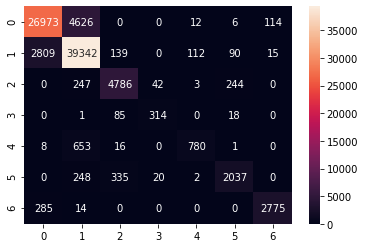

In [182]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

XGB = XGBClassifier(eval_metric='merror', n_estimators=100, learning_rate=0.25, max_depth=11, min_child_weight=1, gamma=0, colsample_bytree=0.7, n_jobs=4)

XGB.fit(train_features, train_labels)

test_pred_labels = XGB.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [183]:
# adding the results to the table

scores.at['XGBoost','Train Accuracy'] = XGB.score(train_features, train_labels)
scores.at['XGBoost','Validation Accuracy'] = XGB.score(val_features, val_labels)
scores.at['XGBoost','Test Accuracy'] = XGB.score(test_features, test_labels)

In [184]:
scores

,Train Accuracy,Validation Accuracy,Test Accuracy
Forest,0.90837,0.875587,0.878408
Forest_SFS,0.986249,0.953474,0.954172
XGBoost,0.919015,0.880821,0.883594
XGBoost_SFS,0.988546,0.954924,0.956696


Besed on the results above we can clearly see that using SFS yield the best scores.

# TabNet

Here I will be using the SFS features.

In [185]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, selected_forest_features_data, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

In [186]:
from pytorch_tabnet.tab_model import TabNetClassifier

X_train = train_features.to_numpy()
y_train = train_labels.to_numpy()
X_valid = val_features.to_numpy()
y_valid = val_labels.to_numpy()
X_test = test_features.to_numpy()
y_test = test_labels.to_numpy() 

clf = TabNetClassifier(device_name='cpu')  # 'cuda:0'

clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
    eval_name=['validation'],
    eval_metric=['accuracy'],
    max_epochs=200, patience=20
    )

preds = clf.predict(X_test)

Device used : cpu
epoch 0  | loss: 0.75641 | validation_accuracy: 0.71092 |  0:00:57s
epoch 1  | loss: 0.62328 | validation_accuracy: 0.75046 |  0:02:01s
epoch 2  | loss: 0.59561 | validation_accuracy: 0.75569 |  0:03:09s
epoch 3  | loss: 0.57072 | validation_accuracy: 0.76359 |  0:04:09s
epoch 4  | loss: 0.5547  | validation_accuracy: 0.77618 |  0:05:09s
epoch 5  | loss: 0.53897 | validation_accuracy: 0.77956 |  0:06:08s
epoch 6  | loss: 0.52705 | validation_accuracy: 0.79556 |  0:07:07s
epoch 7  | loss: 0.51377 | validation_accuracy: 0.80002 |  0:08:09s
epoch 8  | loss: 0.50599 | validation_accuracy: 0.80778 |  0:09:13s
epoch 9  | loss: 0.4995  | validation_accuracy: 0.81148 |  0:10:27s
epoch 10 | loss: 0.49148 | validation_accuracy: 0.80939 |  0:11:30s
epoch 11 | loss: 0.48841 | validation_accuracy: 0.81721 |  0:12:33s
epoch 12 | loss: 0.48357 | validation_accuracy: 0.81718 |  0:13:34s
epoch 13 | loss: 0.47673 | validation_accuracy: 0.82421 |  0:14:33s
epoch 14 | loss: 0.478   | val

For this method I could'nt get a better score than 85% accuracy.

# Conclution

<h2>Based on the results it is better to rely on Sequential Feature Selector rather than correlation based filtering.<br>

I had great difficulty in some of the calculations in terms of the time it took me to find them so I skipped some of them. (I also documented in the proper section)<br>

TabNet results were disappointing. I thought using a more complexed framework will yield better results.</h2>
